### Propensity To Convert Models - Predicting the the likelihood of Customer accepting Personal Loan Offer ###

### Introduction ###
Banks spend millions of dollars on marketing teams and the campaigns in targeting right customer, right channel where the response rate is higher when offer is made. Based on various studies made and the observation I have at my work, the response rate is very low, response rate is below 5% in personal loans space. The low acceptance rate means that randomly choosing customers to market to is incredibly wasteful in terms of both time and money. Thus, it is in the interest of the banks to determine which customers are the most likely to accept this type of loan based on the customer's information. Also the creatives that are being sent are looked at being more personalized so that message in the offer resonates with their situation and make the customers to accept the rate.
For my project, I am focusing only the persona/customer segmentation. Creative design and propensity rate of each creative is something would be further investigated outside of this work.  For this project, I am aiming to apply the K-Means, Support Vector Machine, Logistic Regression, Perceptron, and Multi-layer Perceptron algorithms to predict whether customers will be willing to take on a personal loan. The input into our algorithms will be a customer's age, years of professional experience, annual income measured in thousands of dollars, home address, ZIP code, family size, average spending on credit cards per month measured in thousands, education level, and the value of a house mortgage (if the customer has any). Our algorithm will use this information to output a prediction on whether a customer will take a personal loan (1) or not (0).

In practice, marketing teams can optimize their spend on campaigns by targeting these customers who are likely to accept the offer.
Project Plan. I will be working on the term project individually as my work schedules are pretty tight for group project at this point. I have created high level plan with all the critical tasks and aiming to use that to track the progress and keep myself focused. For peer reviews, I will be partnering with Victoria Hall for each milestone throughout the entirety of the course. I have chosen the dataset and since I am in same domain so hoping I could leverage my domain experience to understand the problem and features better. The dataset is small and I wish if I could get better volumed dataset with at least 100K observations. I would continue to explore and merge the datasets if I found any better.

### Dataset and Features ###
I am choosing the dataset from Kaggle as titled "Personal Loan Modeling" . It contains a list of 5000 bank customer's data resulting from a marketing campaign. For each customer, there are 12 features and a [0,1] label of whether they accepted a personal loan offered in the bank's marketing campaign. The specific features for each customer are described in detail below:
id : Customer ID

### Modeling Methodology ###
For this project, as of now I am aiming to apply the K-Means, Support Vector Machine, Logistic Regression, Perceptron, and Multi-layer Perceptron algorithms to predict whether customers will be willing to take on a personal loan or not. On the model evaluation, I plan to calculate the accuracy, precision, recall and F1 score as well as visualize a confusion matrix and an ROC, AUC curve. I am also interested to explore the use of confidence intervals as thats what I have been hearing at my work but I am yet to understand how to apply them to this problem.

### Risks / Contingencies ### 
Since the dataset is small and simulated dataset, it is highly possible that few models may perform poorly on the data hence as a contingency plan, I have aimed to apply multiple models and compare the results but still results may not be aligned with real world scenario but I take this opportunity in validating my understanding with end to end flow of applying predictive analytics to a problem. 
In general such datasets would be imbalanced so I am keeping closed tab on sampling (under/over) and also hyper parameter tuning because it could help the algorithms distinguish the majority class from the minority data group in our dataset.

In [50]:
###Imprort Libraries
import pandas as pd
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
loan_df = pd.read_csv('C:/Users/Supraja/Desktop/Supraja WORK Apps/7.DSC630/Term Project/Bank_Personal_Loan_Modelling.csv')
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the attributes are numerical. 

In [53]:
loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Personal loan is target variable.Securities Account,CD_account,online,Credit card are all categorical variables. Lets convert those into categorical variables

ID attribute denotes record number so it is not adding value to the dataset hence it can be dropped.

In [54]:
#taking a copy before dropping the attribute
df_loan=loan_df.copy()

#droping id
loan_df.drop(['ID'],axis=1,inplace=True)

In [55]:
loan_df.columns.tolist()

['Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

Few of the attribute having space in the name so lets clean them up and have them as one word.

In [56]:
loan_df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [57]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education']
loan_df[category_col] = loan_df[category_col].astype('category')

In [58]:
loan_df.ZIPCode.nunique()

467

We have data for 467 neighborhoods so there could be some pattern we could expect to see. Lets analyse that later part of the analysis.

In [59]:
loan_df.groupby(['ZIPCode','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size   
PersonalLoan    0  1
ZIPCode             
9307            1  0
90005           5  0
90007           6  0
90009           8  0
90011           3  0
...           ... ..
96091           4  0
96094           2  0
96145           1  0
96150           4  0
96651           6  0

[467 rows x 2 columns]

Its not leading to any significant observations. Perhaps converting zipcodes to county or region perhaps could give some understanding if the
neighborhood is playing any role in loan acceptance. I will reserve ths analysis for this in next milestone.

While navigating the dataset, found few negative values in numerical attributes, lets understand what they mean

In [60]:
# checking negative and zero values for experience. 
loan_df[loan_df['Experience']<0]['Age'].describe()

count    52.000000
mean     24.519231
std       1.475159
min      23.000000
25%      24.000000
50%      24.000000
75%      25.000000
max      29.000000
Name: Age, dtype: float64

52 customers from age group 23 (min) - 30(max) have negative values in experience

In [61]:
loan_df.groupby(['Age','Education'])['Experience'].describe().T

Age              23                   24                       25             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

Age                          26            ...         64         65  \
Education          3          1         2  ...          3          1   
count      19.000000  30.000000  24.00000  ...  30.000000  30.000000   
mean       -0.526316   1.433333   0.75000  ...  38.533333  39.866667   
std         0.696692   0.817200   0.84699  ...   1.756433   0.730297   
min        -2.000000   0.000000  -1.00000  ...  34.000000  39.000000   
25%        -1.000000   1.000000   0.00000  ...  38.000000  39.000000   
50%        -1.000000   2.000000   1.00000  ...  39.000000  40.000000   
75%         0.000000   2.000000   1.00000  ...  40.000000  40.000000   
max         1.000000   2.000000   2.00000  ...  40.000000  41.000000   

Age                                     66                               67  \
Education          2          3          1          2          3          1   
count      23.000000  27.000000   9.000000   5.000000  10.000000   5.000000   
mean       40.086957  39.518519  41.111111  41.400000  40.400000  41.600000   
std         0.733178   1.553417   0.333333   0.547723   1.646545   0.894427   
min        39.000000  35.000000  41.000000  41.000000  36.000000  41.000000   
25%        40.000000  39.000000  41.000000  41.000000  40.250000  41.000000   
50%        40.000000  40.000000  41.000000  41.000000  41.000000  41.000000   
75%        41.000000  41.000000  41.000000  42.000000  41.000000  42.000000   
max        41.000000  41.000000  42.000000  42.000000  42.000000  43.000000   

Age                             
Education          2         3  
count       3.000000   4.00000  
mean       42.666667  41.50000  
std         0.577350   0.57735  
min        42.000000  41.00000  
25%        42.500000  41.00000  
50%        43.000000  41.50000  
75%        43.000000  42.00000  
max        43.000000  42.00000  

[8 rows x 134 columns]

Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [62]:
loan_df.loc[loan_df['Experience']<0,'Experience']=np.abs(loan_df['Experience'])

In [63]:
# checking negative and zero values for experience. 
loan_df[loan_df['Experience']<0]['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

In [64]:
loan_df[loan_df['Experience']==0]['Age'].describe()

count    66.000000
mean     25.636364
std       1.145377
min      24.000000
25%      25.000000
50%      26.000000
75%      26.000000
max      30.000000
Name: Age, dtype: float64

There are significant number of records with in age of 23, 24 are having 0 in experience. They could be genuine as well. Lets see how to handle these later

### Exploratory Data Analysis ###

In [65]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### Observations

Customers age is in range of 23 - 67, with mean and median of ~45.

Maximum experience is 43 years. where as mean and median are ~20.

Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. Need to check for outliers if any.

Maximum mortgage taken is 635k USD. Need to check for outliers if any

Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD

#### Age
Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [66]:
loan_df['Agebin'] = pd.cut(loan_df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

#### Income
To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [67]:
# Create a new variable - Income group

loan_df["Income_group"] = pd.cut(
    x=loan_df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

#### Spending
To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [68]:
loan_df["Spending_group"] = pd.cut( x=loan_df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

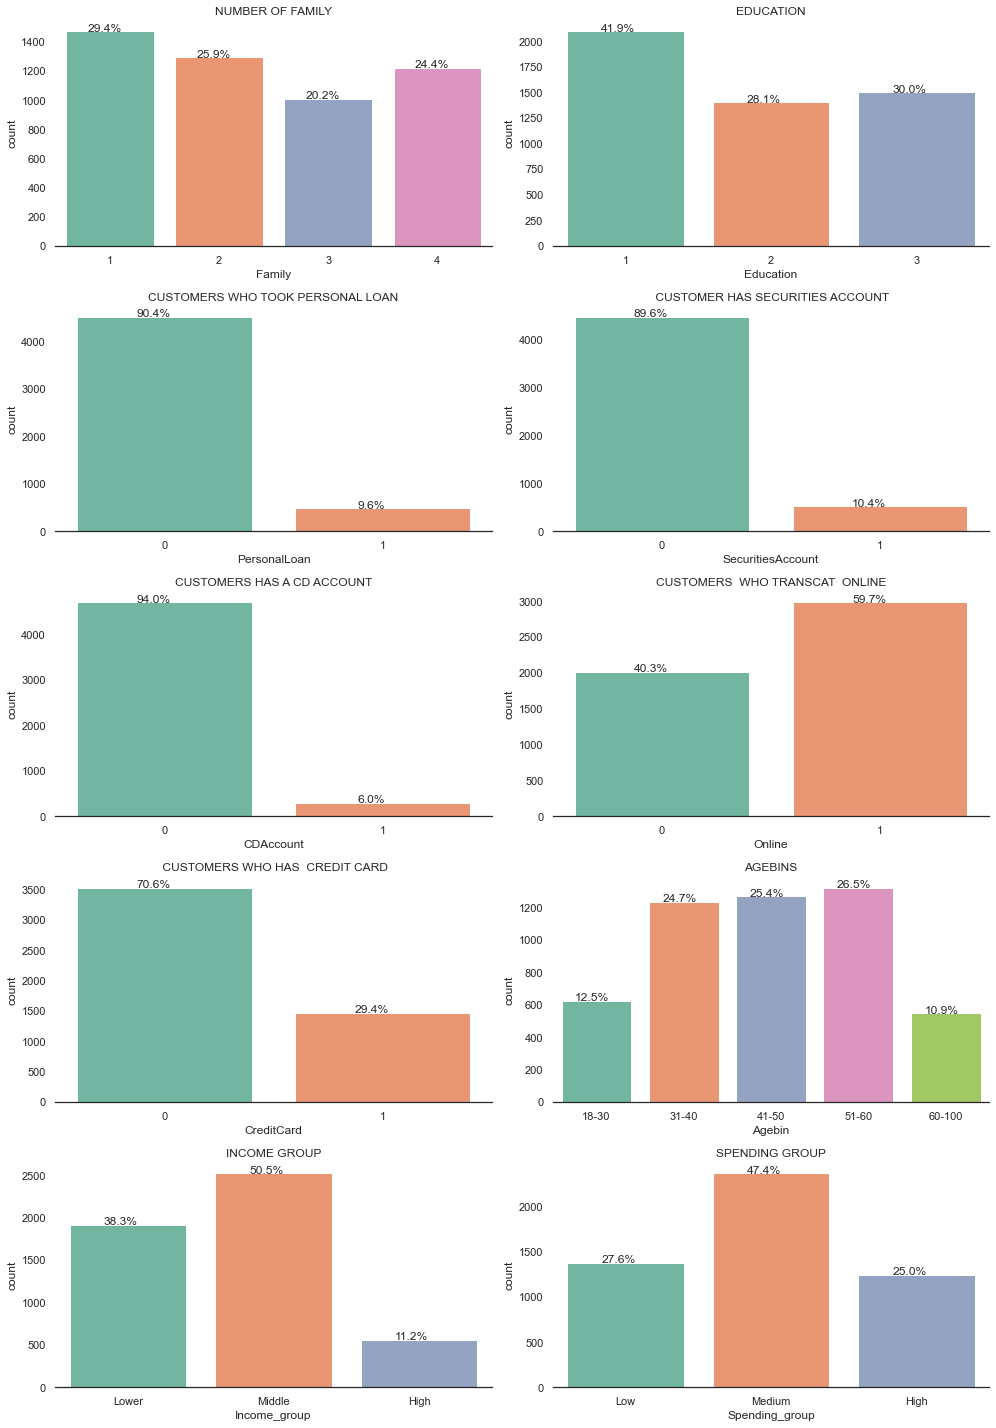

In [69]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = loan_df[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=loan_df[variable], data=loan_df )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(loan_df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

### Observations

~29.4 % customers are single.

~41.9% customers are undergrad.

~9.6% bought a personal loan from the bank.

10.4 % customers have a securities account with the bank

6 % customer have a CD account.

60% customers transact online.

29.4% customers have credit cards.

~ 75 % of customers are in range of 31- 60.

~ 50 % Most of bank customers belong to middle income group.

~48 % of customers has medium Average spending

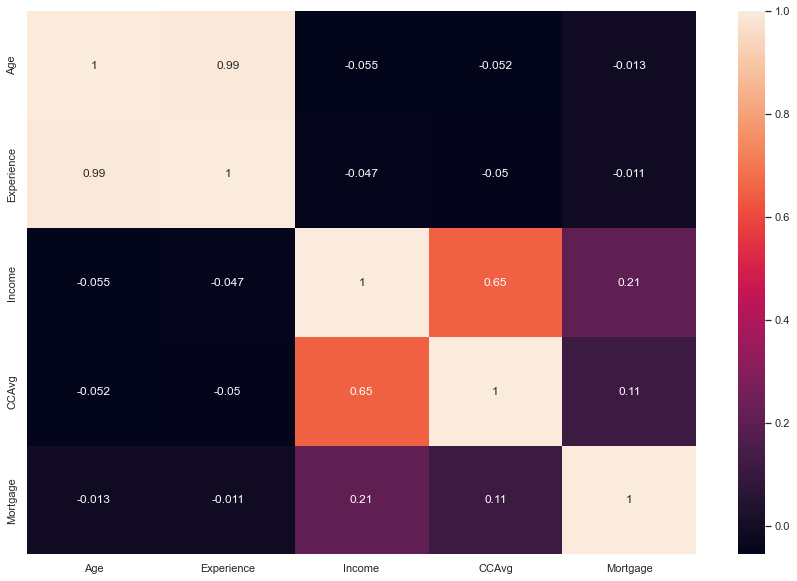

In [70]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

### Observations

As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.

Income and Average spending on credit card are positively corrleated.

Mortgage has very little correlation with income.

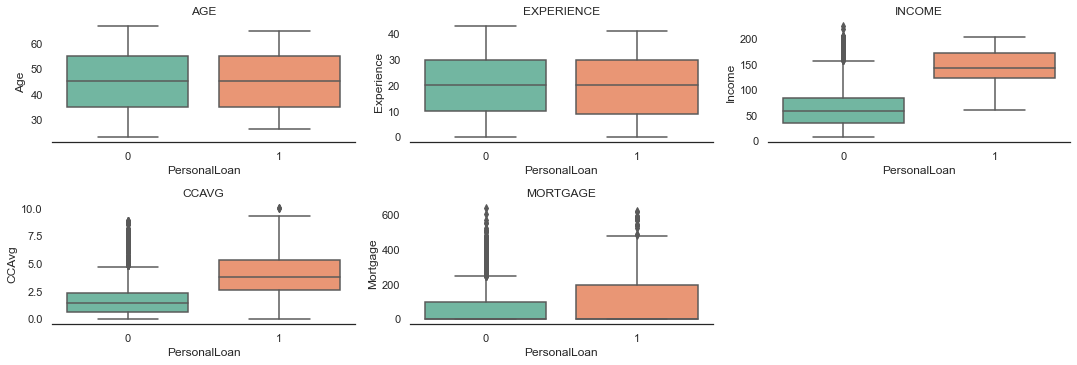

In [71]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= loan_df[variable], data=loan_df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


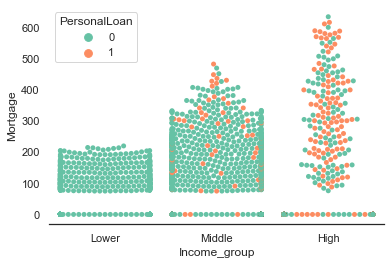

In [72]:
sns.swarmplot(x='Income_group',y='Mortgage',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Supraja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


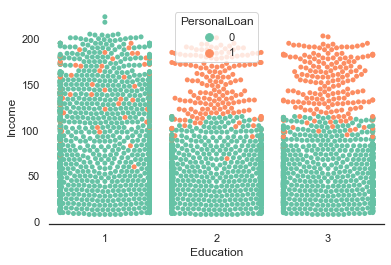

In [73]:
sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

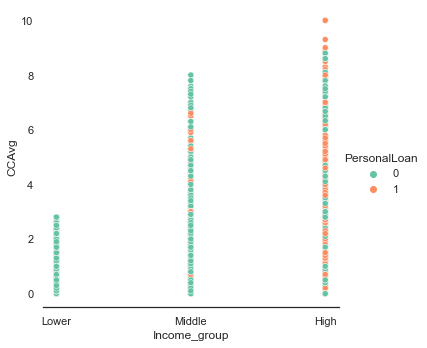

In [74]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=loan_df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

In [75]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,loan_df['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan_df['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1088  134  1222
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


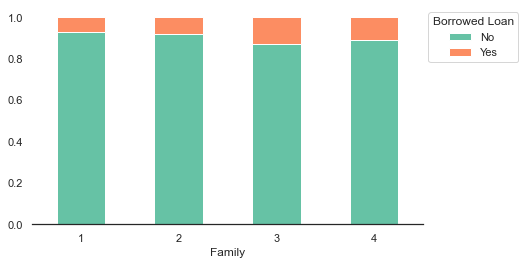

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1296  205  1501
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


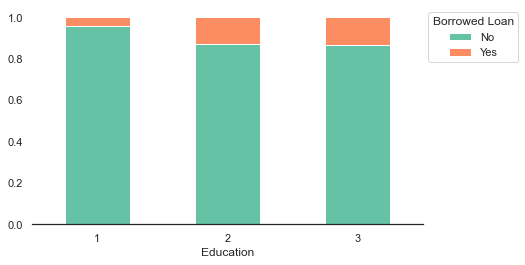

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4058  420  4478
1                   462   60   522
All                4520  480  5000
------------------------------------------------------------------------------------------------------------------------


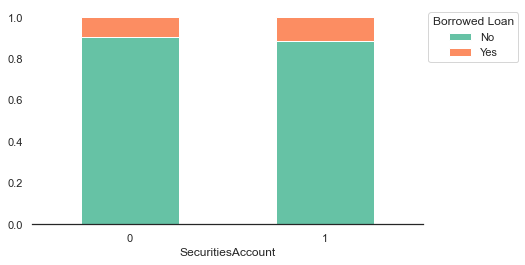

PersonalLoan     0    1   All
CDAccount                    
0             4358  340  4698
1              162  140   302
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


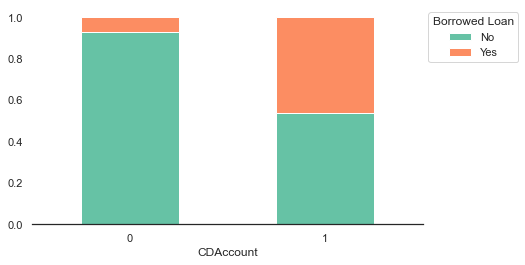

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1327  143  1470
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


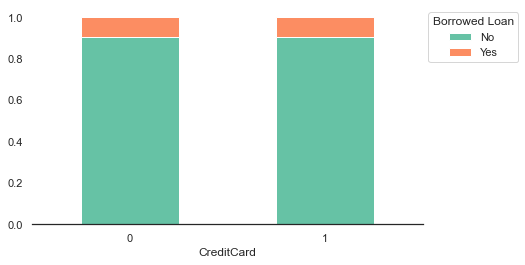

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2693  291  2984
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


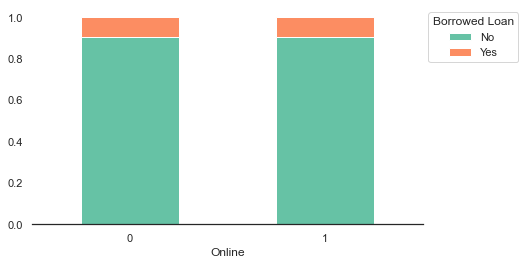

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1208  115  1323
60-100         488   59   547
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


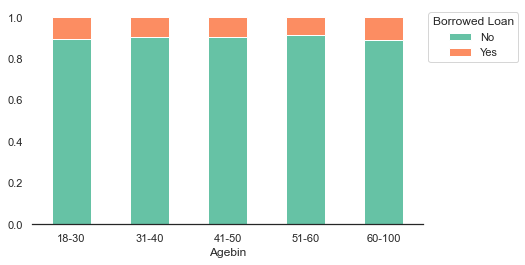

PersonalLoan     0    1   All
Income_group                 
Lower         1914    0  1914
Middle        2301  223  2524
High           305  257   562
All           4520  480  5000
------------------------------------------------------------------------------------------------------------------------


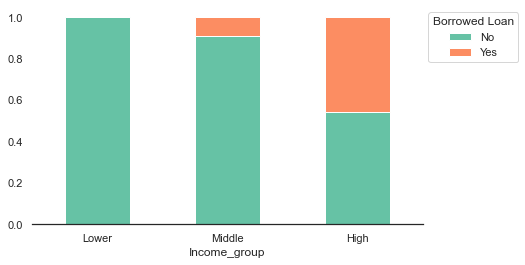

PersonalLoan       0    1   All
Spending_group                 
Low             1342   39  1381
Medium          2292   79  2371
High             886  362  1248
All             4520  480  5000
------------------------------------------------------------------------------------------------------------------------


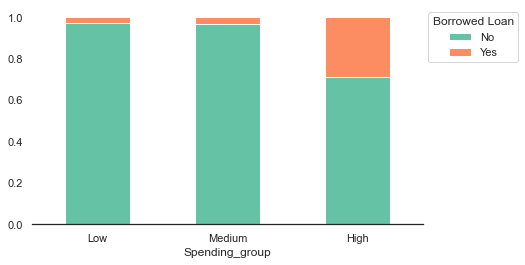

In [76]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(loan_df[variable])

### Observations

People with higher income had opted for personal loan before.

People with high mortgages opted for loan.

Customers with higher average monthly credit usage have opted for loan.

Customers with higher income had higher average credit card usage and mortgage.

Graduate and Advanced/Professional have higher monhtly credit card usage and have borrowed loans with the bank.

Lets review the target variable PersonalLoan

([<matplotlib.patches.Wedge at 0x1a97382c460>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

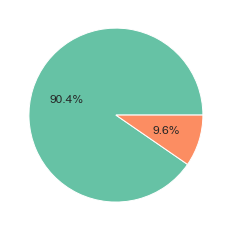

In [77]:
plt.pie(data=loan_df,x=loan_df["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset. 
This can be handled using weight or SMOTE. Lets explore that in next milestone.

## Summary

### Dataset Description:
Dependent variable is the Personal_loan which is of categorical data type.
Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
There were no missing values in the dataset.

### Data Preprocessing:
I observed that some observations where experience = -ve but since there was a strong correlation with age , dropped experience.
I have also created Age bin ,Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.

### Observations from EDA:
People with higher income had opted for personal loan before.

People with high mortgages opted for loan.

Customers will higher average monthly credit usage have opted for loan.

Customers with Family of 3 members had borrowed the loans with the bank.

Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.

Customers who had certificate of deposit with the bank had previously borrowed loan

Majority of customers who did have Personal loan with the bank used Online facilities.


### Preliminary Customer segmentation

Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.

Few Customers in medium income group don't have higher mortages and have less average monthly credit card spending .They are average profile clients.

Customer in lower income group have less mortages( few outliers are there) ,less monthly spending. They are our low profile clients.

### Actions for data pre-processing:
Many variables have outliers that need to be treated.

Also few attributes can be dropped as some of them are redundant and few others are created for EDA such as Experience, Zipcode, Agebin, Income_group, Spending_group.

## Conclusion
From the initial EDA, this dataset does have sufficient information to begin modeling.
As per summary provided above, i would spend little more time on data preprocessing especially on outliers and dropping few attributes.
After that, I will begin my modeling. I also would explore more in dealing with the imblance dataset. I have few techniques in mind to increase the effiecetiveness of the dataset.
As mentioned in milestone2 and ince this is a classic classification problem, I will be using different models to predict.
 